In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, optimizers, TextVectorization
import matplotlib.pyplot as plt

ImportError: cannot import name 'TextVectorization' from 'tensorflow.keras' (c:\Users\62853\Myne\Lib\site-packages\keras\_tf_keras\keras\__init__.py)

In [ ]:
vocab_size = 1000
embedding_dim = 100
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [ ]:
data = pd.read_csv('data.csv')
sentences = data['text'].str.lower().tolist()
labels = data['label'].tolist()
stopword = [
    "yang", "dan", "di", "ke", "dari", "untuk", "dengan", "pada", "adalah",
    "ini", "itu", "saya", "kita", "anda", "akan", "telah", "sebagai", "atau",
    "jadi", "karena", "tidak", "dalam", "lebih", "lagi", "hanya", "sudah", "juga"
]



In [ ]:
processed_sentences = []
for sentence in sentences:
    for word in stopword:
        sentence = sentence.replace(f" {word} ", " ")  # Remove stopwords
    processed_sentences.append(sentence.strip())

In [ ]:
train_size = int(len(processed_sentences) * 0.8)

train_sentences = processed_sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences =processed_sentences[train_size:]
validation_labels = labels[train_size:]

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
training_label_seq = np.array(train_labels)
validation_label_seq = np.array(validation_labels)

In [ ]:
model = models.Sequential([
    layers.Embedding(vocab_size, embedding_dim),
    layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    layers.Bidirectional(tf.keras.layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0,5),
    layers.Dense(8, activation='softmax')
    ])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history = model.fit(train_padded, training_label_seq,
                    epochs=10,
                    validation_data=(validation_padded, validation_label_seq))

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step - accuracy: 0.2555 - loss: 1.8441 - val_accuracy: 0.7437 - val_loss: 0.7235
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.7882 - loss: 0.5708 - val_accuracy: 0.8775 - val_loss: 0.3665
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.8990 - loss: 0.3092 - val_accuracy: 0.8737 - val_loss: 0.3702
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 241ms/step - accuracy: 0.9657 - loss: 0.1398 - val_accuracy: 0.9438 - val_loss: 0.2029
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.9731 - loss: 0.0970 - val_accuracy: 0.9563 - val_loss: 0.1480
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.9893 - loss: 0.0459 - val_accuracy: 0.9563 - val_loss: 0.1850
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.9923 - loss: 0.0282 - val_accuracy: 0.9513 - val_loss: 0.1621
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.9933 - loss: 0

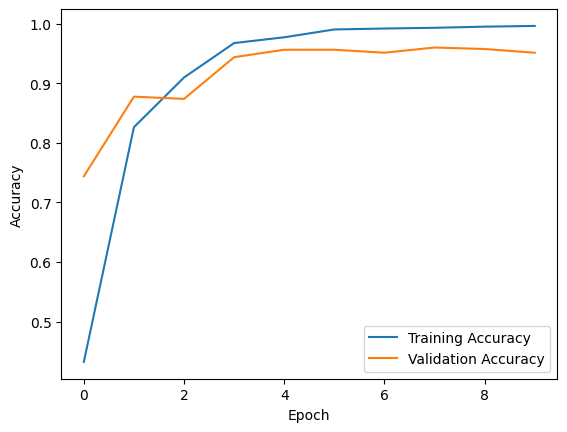

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Mapping label numerik ke nama emosi
emotion_labels = {
    0: "waspada",
    1: "marah",
    2: "jijik",
    3: "takut",
    4: "senang",
    5: "sedih",
    6: "terkejut",
    7: "percaya"
}

while True:
    user_input = input("input: ").lower()
    if user_input == "exit":
        print("Program selesai.")
        break

    # Hilangkan stopword pada input
    for word in stopword:
        user_input = user_input.replace(f" {word} ", " ")
    
    # Preprocessing input
    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, padding=padding_type, maxlen=max_length)

    # Prediksi emosi menggunakan model
    prediction = model.predict(user_input_padded)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Ambil nama emosi berdasarkan prediksi
    emotion = emotion_labels.get(predicted_label, "Tidak diketahui")
    print("Input : ", user_input)
    print(f"Prediksi emosi: {emotion} (Confidence: {confidence:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Input :  aku wisuda hari tetapi ada datang merayakan mengucapkan selamat
Prediksi emosi: terkejut (Confidence: 74.58%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Input :  aku wisuda hari tetapi ada merayakan bersama saya
Prediksi emosi: sedih (Confidence: 98.27%)
Program selesai.


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step


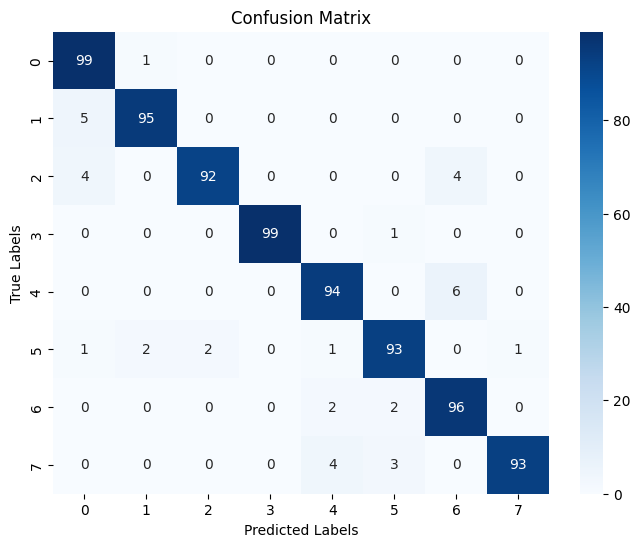

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       100
           1       0.97      0.95      0.96       100
           2       0.98      0.92      0.95       100
           3       1.00      0.99      0.99       100
           4       0.93      0.94      0.94       100
           5       0.94      0.93      0.93       100
           6       0.91      0.96      0.93       100
           7       0.99      0.93      0.96       100

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800

Accuracy: 95.12%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Buat prediksi pada data validasi
predictions = model.predict(validation_padded)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(validation_label_seq, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(labels), yticklabels=set(labels))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(validation_label_seq, predicted_classes))

# Accuracy
accuracy = accuracy_score(validation_label_seq, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")
